# Variation of coefficients
The goal of this exercise is to understand the variation of the coefficients of the predictors with varying values of regularization parameter in Lasso and Ridge regularization.

In [1]:
# Import libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

import warnings 
warnings.filterwarnings('ignore')

In [5]:

# Run this cell for more readable visuals 

large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

In [6]:


# Read the file "bacteria_train.csv" as a dataframe

df = pd.read_csv("bacteria_train.csv")

# Take a quick look of your dataset

df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [7]:
# Store the predictor ('Spreading_factor') and the response ('Perc_population') values as the variables 'x' and 'y'

x, y  = df[["Spreading_factor"]], df["Perc_population"]

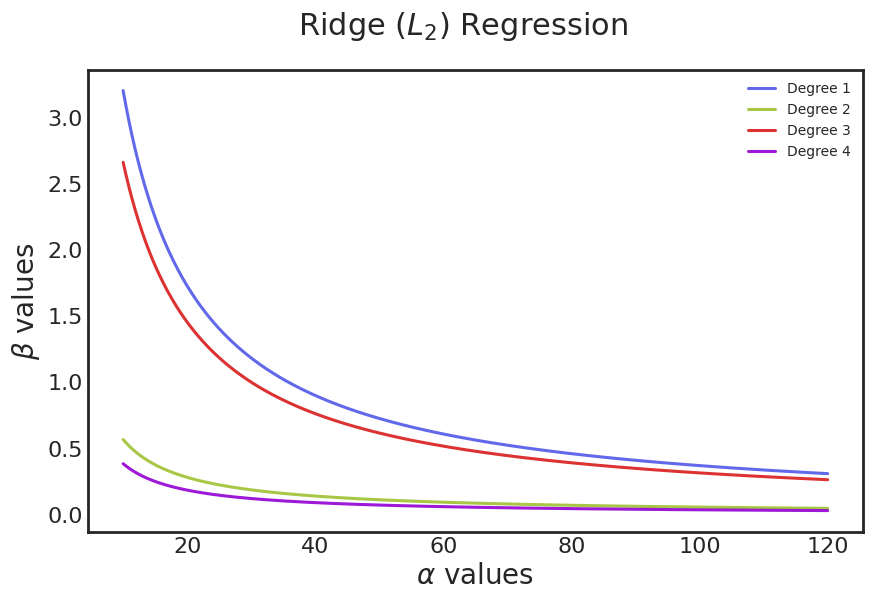

In [8]:
# Select the number of polynomial features as per the maximum degree
# set include_bias to false to avoid adding an extra intercept to our models

maxdeg = 4
x_poly = PolynomialFeatures(maxdeg, include_bias=False).fit_transform(x)
x_poly = normalize(x_poly, axis=0)

# Select a list of alpha values ranging from 10 to 120 with 1000 points between them

alpha_list = np.linspace(10,120,1000)
len(alpha_list)

### edTest(test_ridge_fit) ###
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


# Now, you will implement the ridge regularisation for each alpha value

for a in alpha_list:

    ridge_reg = Ridge(alpha=a)

    # Fit on the entire data because we just want to see the trend of the coefficients

    ridge_reg.fit(x_poly, y)
    
    # Append the coeff_list with the coefficients of the model
    
    coeff_list.append(ridge_reg.coef_)


# We take the transpose of the list to get the variation in the coefficient values per degree

ridge_trend = np.array(coeff_list).T


# Use the code below to plot the variation of the coefficients as per the alpha value

# Just adding some nice colors. make sure to comment this cell out if you plan to use degree more than 7
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(ridge_trend[i]), color=colors[i],
            alpha = 0.9, label = f'Degree {i+1}', lw=2.2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Ridge ($L_2$) Regression');

Compare the results of Ridge regression with the Lasso variant

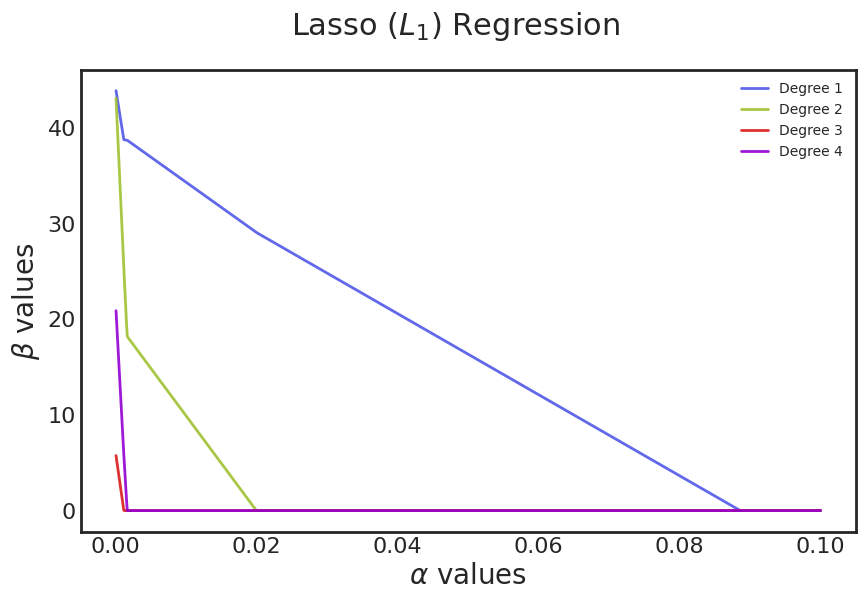

In [9]:
# Select a list of alpha values ranging from 1e-4 to 1e-1 with 1000 points between them

alpha_list = np.linspace(1e-4,1e-1,1000)
len(alpha_list)

### edTest(test_lasso_fit) ###
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


# Now, you will implement the ridge regularisation for each alpha value

for a in alpha_list:

    lasso_reg = Lasso(alpha=a,max_iter=250000)

    # Fit on the entire data because we just want to see the trend of the coefficients
    
    lasso_reg.fit(x_poly, y)
    
    # Again append the coeff_list with the coefficients of the model
    
    coeff_list.append(lasso_reg.coef_)


# We take the transpose of the list to get the variation in the coefficient values per degree

lasso_trend = np.array(coeff_list).T

# Use helper code below to plot the variation of the coefficients as per the alpha value

colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(lasso_trend[i]), color=colors[i], 
            alpha = 0.9, label = f'Degree {i+1}', lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression');

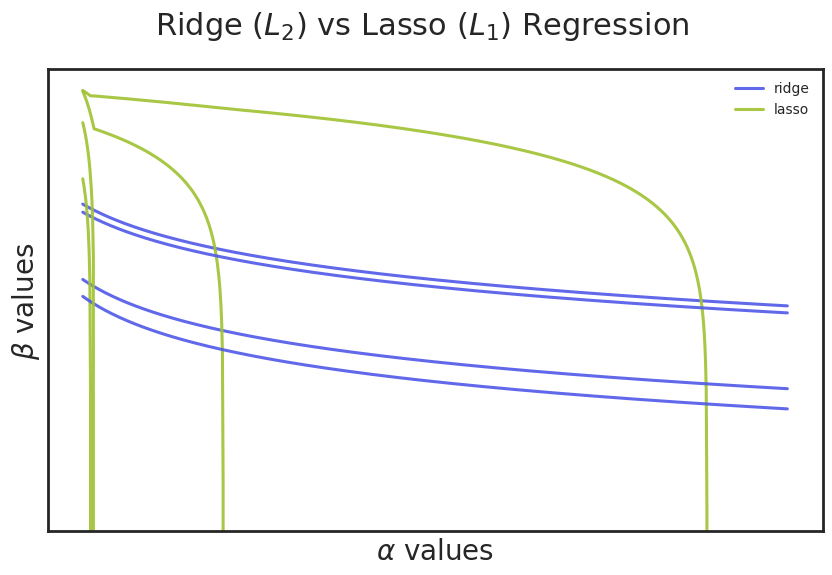

In [10]:
# Plot the variation of log-betas on vs the alpha value
# This plot makes it even more clear that ridge does not shrink coefs to 0.

# colors for the different methods.colors = ['dodgerblue', 'orangered']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    if i == 0:
        labels = ["ridge", "lasso"]
    else:
        labels = [None, None]
    ax.semilogy(alpha_list, np.abs(ridge_trend[i]), color=colors[0],
                alpha = 0.9, lw=2.2, label = labels[0])
    ax.semilogy(alpha_list, np.abs(lasso_trend[i]), color=colors[1],
                alpha = 0.9, lw=2.2, label = labels[1])
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
    ax.tick_params(axis='both',which='both',bottom=False,top=False,
                labelbottom=False,labelleft=False)

fig.suptitle(r'Ridge ($L_2$) vs Lasso ($L_1$) Regression');

After marking the exercise, go back and change your maximum degree, and see how your coefficients vary for higher degrees

Remember to hide your colors variable to avoid index error while plotting coefficients



The consistency of these trends are due in part to the normalization used. Try removing sklearn's normalize step after PolynomialFeatures. Things look different. Try to think why - Hint think of colinearity